# Análisis de la Base de Datos


### **Selección de la base de datos**
---

Se utilizará la base de datos [*Students Performance Dataset - Academic Success Factors in High School Students*](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset), la cual contiene datos acerca de estudiantes de escuela secundaria, sus actividades extracurriculares, las horas de estudio, etc.

El objetivo de la red a realizar es, a partir de los datos provistos, poder predecir el rendimiento académico de los alumnos (en un principio, si es *bueno* o *malo*), y determinar qué características influyen en dichos resultados.


In [140]:
#Se importa la librería para procesar la base de datos
import pandas as pd

#Estas funciones modifican cuántos datos se ve cuando se imprime el dataframe 👇 se puede ir tocando
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
#pd.reset_option('all') #Esto lo reinicia                            ----- # Comento esto porque hace saltar una advertencia (FutureWarning... tiene que ver con cosas de la librería que van a retirar próximamente, creo.).

path_file = "students.csv"
dataframe = pd.read_csv(path_file)
##print(dataframe)

In [141]:
dataframe.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


### **Tipos de datos**
---
A continuación se detallan las columnas con las que se cuenta, y los tipos de datos que representan:
- ***StudentID***: Número de identificación del estudiante (Categórica)
- ***Age***: Edad de los estudiantes (valores entre 15 y 18 años) (Discreta)
- ***Gender***: Género (0 = masculino, 1 = femenino) (Categórica)
- ***Ethnicity***: Etnia (0 = Caucásico, 1 = Afroamericano, 2 = Asiático, 3 = Otro) (Categórica)
- ***ParentalEducation***: Educación máxima alcanzada por los padres (0 = Ninguna, 1 = Secundario completo, 2 = Universidad, 3 = Bachiller, 4 = Más alto) (Categórica)
- ***StudyTimeWeekly***: Horas semanales de estudio (Continua)
- ***Absences***: Inasistencias durante un año (Discreta)
- ***Tutoring***: Si reciben tutoría especial (0 = No, 1 = Sí) (Categórica)
- ***ParentalSupport***: Nivel de apoyo de los padres (0 = Ninguno, 1 = Bajo, 2 = Moderado, 3 = Alto, 4 = Muy alto) (Categórica)
- ***Extracurricular-Sports-Music-Volunteering***: Si realiza actividades extracurriculares, como deportes, música o solidarias (0 = No, 1 = Sí) (Categórica)
- ***GPA***: Calificación, en una escala de 0 a 4 (Continua)
- ***GradeClass***: Clasificación según GPA {
    
                                        0: 'A' (GPA >= 3.5)
                                        1: 'B' (3.0 <= GPA < 3.5)
                                        2: 'C' (2.5 <= GPA < 3.0)
                                        3: 'D' (2.0 <= GPA < 2.5)
                                        4: 'F' (GPA < 2.0)} (Categórica)

### **Correlaciones**
---

Para determinar cuáles de las características estudiadas tienen más relación con la calificación de los estudiantes, que es lo que se quiere intentar predecir, se puede calcular el índice de correlación entre las variables, donde valores cercanos a 1 y a -1 indican mayor dependencia positiva o negativa, respectivamente.
En caso de que los valores tiendan a 0, prácticamente no hay ningún tipo de relación entre las variables.


In [142]:
#Evaluación de correlación de variables respecto de la columna "GPA"
print(dataframe.corr()["GPA"])

StudentID           -0.002697
Age                  0.000275
Gender              -0.013360
Ethnicity            0.027760
ParentalEducation   -0.035854
StudyTimeWeekly      0.179275
Absences            -0.919314
Tutoring             0.145119
ParentalSupport      0.190774
Extracurricular      0.094078
Sports               0.057859
Music                0.073318
Volunteering         0.003258
GPA                  1.000000
GradeClass          -0.782835
Name: GPA, dtype: float64


Para ilustrar mejor las correlaciones entre las distintas variables y la GPA, podemos hacer uso de una **matriz de correlaciones**:

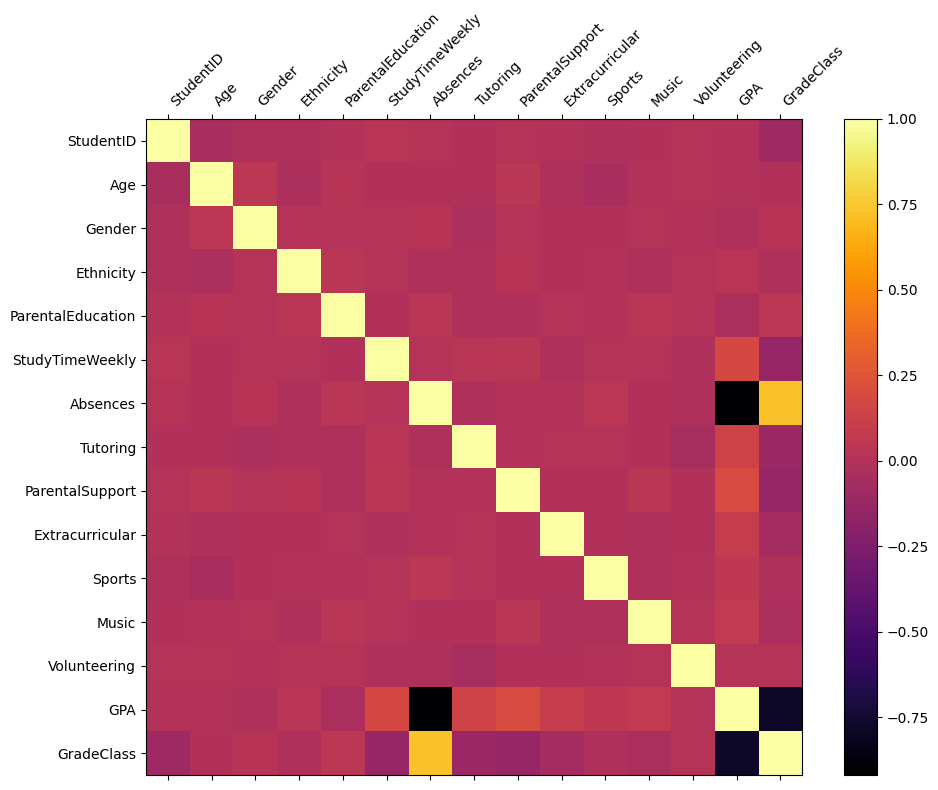

In [143]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Suponiendo que ya tienes cargado tu dataframe
dataframe = pd.read_csv("students.csv")

labels = dataframe.columns.to_list()

correlation_matrix = dataframe.corr() # Se calcula la matriz de correlación.

fig, ax = plt.subplots(figsize=(10, 8)) # Acá grafica y de paso ajustamos tamaño.

cax = ax.matshow(correlation_matrix, cmap="inferno")  # Se printea la matriz, cmap es para la paleta de colores. (creo que "inferno" es el que más safa, cmap="Set1" es cursed)

fig.colorbar(cax) # Esta es la barra de colores lateral, ayuda a guiarse.

# Nombres
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

# Etiquetas
ax.set_xticklabels(labels, rotation=45, ha='left')  # Rotamos las etiquetas en el eje X para mejor legibilidad
ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()


Como se puede observar en la matriz de correlaciones, son un par de variables, o columnas, las que más influyen en la GPA.

Tenemos que "StudyTimeWeekly", "Tutoring", "ParentalSupport" tienen cierta relación positiva, mientras que "Absences" una relación extremadamente negativa: a más faltas, peor GPA.

Por otro lado, vemos que hay algunas columnas como "StudentID" (Directamente no suma nada), "Age", "Gender", "Ethnicity" o "Volunteering" que no aportan nada.

Luego, GradeClass es un caso especial, ya que esa variable categoriza el GPA del alumno (como se explicó anteriormente), por ello la descartamos, nosotros somos los que queremos categorizar al alumno en **bueno** o **malo**.

### **Análisis de las variables**
---

Lo primero que podemos observar es que las variables que más se relacionan con GPA son las inasistencias y la clasificación según GPA, ambas de forma negativa, lo cual, a simple vista, es lógico. Pareciera ser que, a más inasistencias, menor será el rendimiento. Además, un valor de clasificación bajo, por la forma en que se creó el dataframe, indica un GPA alto.
Otra observación posible es que tanto el ID del estudiante, como su edad, género o etnia no influyen en las calificaciones de un alumno.

A continuación, una clasificación de las variables que consideraremos útiles (o no) para nuestra red neuronal:

##### Variables que **sí** nos interesan **(Influyen en el GPA)**:
- **Inasistencias**  
   Se puede observar en la correlación que a mayor número de inasistencias, menor es el GPA.

Luego, en menor medida:

- **Educación de los padres**
- **Horas semanales de estudio**
- **Tutoría**
- **Soporte parental**
- **Actividad extracurricular**
- **Deportes**
- **Música**

Estas últimas variables tienen una correlación positiva moderada (aumentan a la par que el GPA), por lo que también aportan información relevante sobre el GPA.
   
##### Variables que **no** nos interesan **(No influyen en el GPA)**:

- **Edad**
- **Género**
- **Etnia**
- **Actividad solidaria** (actividad extracurricular)

Estas variables no presentan una relación directa con el rendimiento académico medido por el GPA.

A continuación, una representación gráfica de las correlaciones anteriormente mencionadas.

Los gráficos muestran la correlación entre las distintas variables que mencionamos y el GPA.

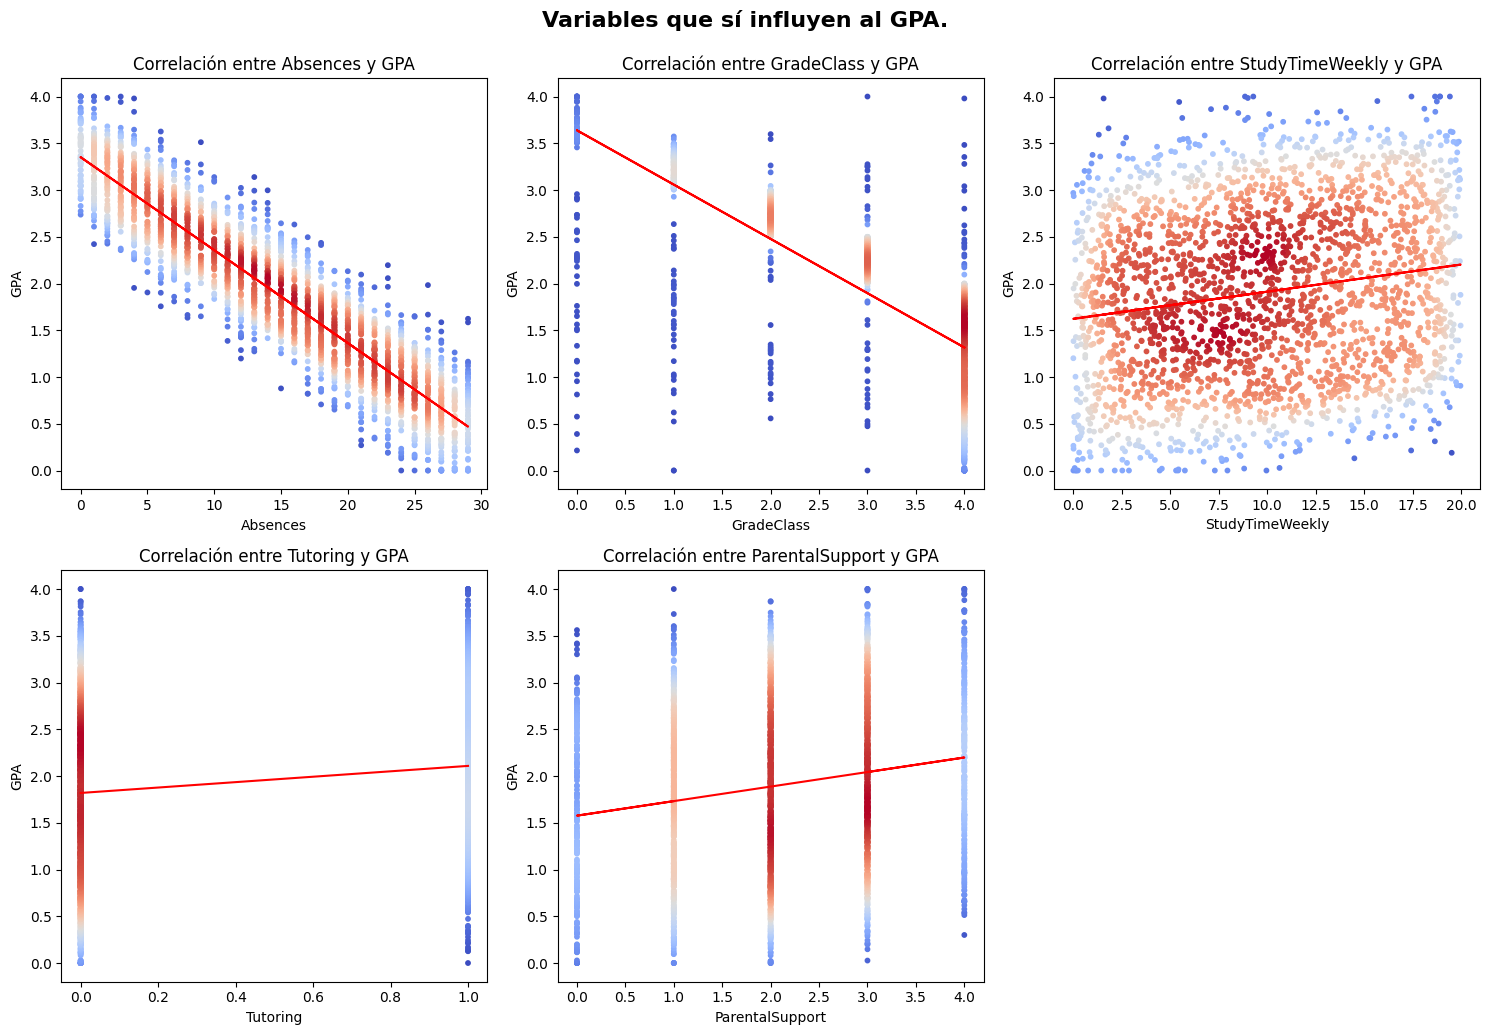

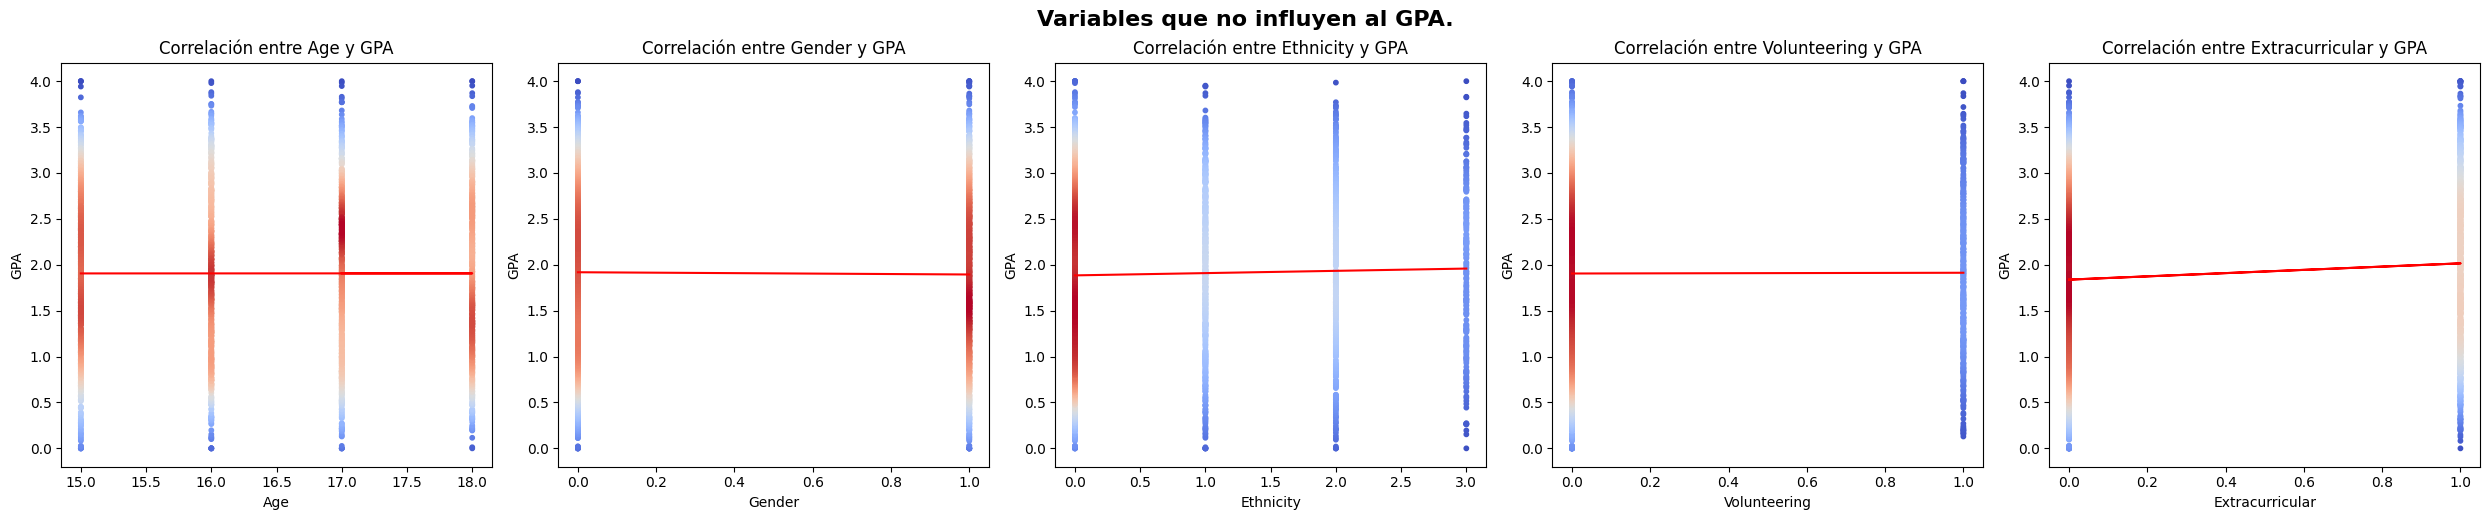

In [144]:
#Se importan las librerías para crear los gráficos
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

dataframe = pd.read_csv("students.csv") # Esto evita tener que ejecutar todo (Run All) para que funcione correctamente la celda de código.

# Lista de variables que vamos a comparar contra el GPA.
variablesConCorrelacion = ["Absences", "GradeClass", "StudyTimeWeekly", "Tutoring", "ParentalSupport"]
variablesSinCorrelacion = ["Age", "Gender", "Ethnicity", "Volunteering", "Extracurricular"]

# Función para graficar listas de variables contra el GPA, ajustada para el número de variables.
def graficadoraCorrelacionGPA(listaDeVariables, titulo, Large):
    num_variables = len(listaDeVariables)  # Número de variables en la lista

    if (Large):
        num_filas = (num_variables + 2) // 3  # Calcular el número de filas necesarias (3 por fila)
        fig, axs = plt.subplots(num_filas, 3, figsize=(15, 5 * num_filas))
        axs = axs.flatten()
    else:
        fig, axs = plt.subplots(1, num_variables, figsize=(5 * num_variables, 5)) # Creamos una fila que contenga cada gráfico.
        axs = axs.flatten()

    for i, var in enumerate(listaDeVariables):  # Iteramos por cada elemento de la lista.
        x = dataframe[var]
        y = dataframe["GPA"]

        # Calcular la densidad de los puntos
        xy = np.vstack([x, y])
        densidad = gaussian_kde(xy)(xy)

        # Ordenamos por densidad
        idx = densidad.argsort()
        x, y, densidad = x[idx], y[idx], densidad[idx]

        # Graficamos el scatter plot usando la densidad para el color de los puntos
        sc = axs[i].scatter(x, y, c=densidad, cmap='coolwarm', s=10)

        # Ajustamos una regresión lineal para ver mejor la correlación
        m, b = np.polyfit(x, y, 1)
        axs[i].plot(x, (m * x + b), color="red")  # Línea roja

        axs[i].set_title(f"Correlación entre {var} y GPA")
        axs[i].set_xlabel(var)
        axs[i].set_ylabel("GPA")

    # Eliminar gráficos vacíos
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.suptitle(titulo, fontweight='bold', fontsize=16, y=1.03)
    plt.show()

# Ahora llamamos la función para ambas listas
# En la función agregué un parámetro: "Large". Dependiendo si es true o false se genera un gráfico grande o pequeño respectivamente.
graficadoraCorrelacionGPA(variablesConCorrelacion, "Variables que sí influyen al GPA.", True)
graficadoraCorrelacionGPA(variablesSinCorrelacion, "Variables que no influyen al GPA.", False)

Con los gráficos anteriores, queda en evidencia lo planteado.

Si bien podría no haber sido necesario hacerlos, con esto queda confirmado que hay variables que **no nos sirven**, como *age*, *gender*, *volunteering* o *ethnicity*. Y si bien en esta última se aprecia una pequeña pendiente, es despreciable, y más aún cuando no es nuestro objeto de estudio.

### **Factibilidad y Objetivo**
---
Consideramos que esta base de datos es los uficientemente adecuada para poder afrontar un trabajo práctico sobre redes neuronales básicas: vamos a tratar de predecir algo simplemente binario (como practicamos), en este caso: si un alumno es **bueno** o **malo**.

Entonces, primero que nada, tenemos que tener en claro que nuestro objetivo es, dadas ciertas entradas (variables que sí nos interesan), sobre estudiantes de secundaria que estén dentro del rango de nuestra muestra, poder hacer uso de nuestra red neuronal para intentar predecir con un cierto grado de precisión si este es un alumno **bueno** o **malo**. (es decir, si su GPA > 2 o su GPA <= 2 respectivamente.)

Para ello vamos a tener que tener en cuenta las columnas de las que disponemos, y seleccionar cuáles nos sirven y cuáles no, lo cual ya dejamos en claro anteriormente.

Repasando, vemos que las variables que más influyen en el GPA de un alumno (positivamente) son las asistencias, horas semanales, tutoria, etc. Por otro lado, se puede observar que las que no influyen tienen que ver con la edad, el género, étnia y actividad solidaria.

Además tenemos casos como el de la etnia, donde se puede encontrar una muy leve correlación (y tal vez sea interesante analizarlo brevemente), aunque es prácticamente despreciable y no es precisamente el objetivo de este trabajo.

Y para redondear, la variable o columna "gradeClass" queda descartada por ir directamente de la mano con la variable que queremos predecir, GPA.

En síntesis, consideramos que tenemos una base de datos suficiente para lograr nuestro cometido, es decir, para montar una red neuronal básica y aplicar los conceptos fundamentales que aprendimos a lo largo de la materia (tanto de análisis como de machine learning).

###### Lo anterior es por ahora, si se nos hace fácil podríamos intentar categorizar nosotros (aunque supuestamente necesitaríamos una muestra más grandes y cambiar parte de la red, pero es posible), es decir, predecir a qué categoria (gradeClass) pertenece el alumno.

###### Probablemente falta explayarse más en el objetivo y coso, lo dejo así por ahora. ¯\_(ツ)_/¯

### **Valores Atípicos y Limpieza de Datos**
---

Para ver si tenemos valores atípicos problemáticos, es decir, que nos estén modificando la media de forma exagerada, o que de alguna otra forma distorsionen una posible interpretación de los datos, podemos hacer uso de boxplots para identificarlos.

Finalmente, en caso de ser necesario, deberemos limpiarlos (eliminarlos o modificarlos).

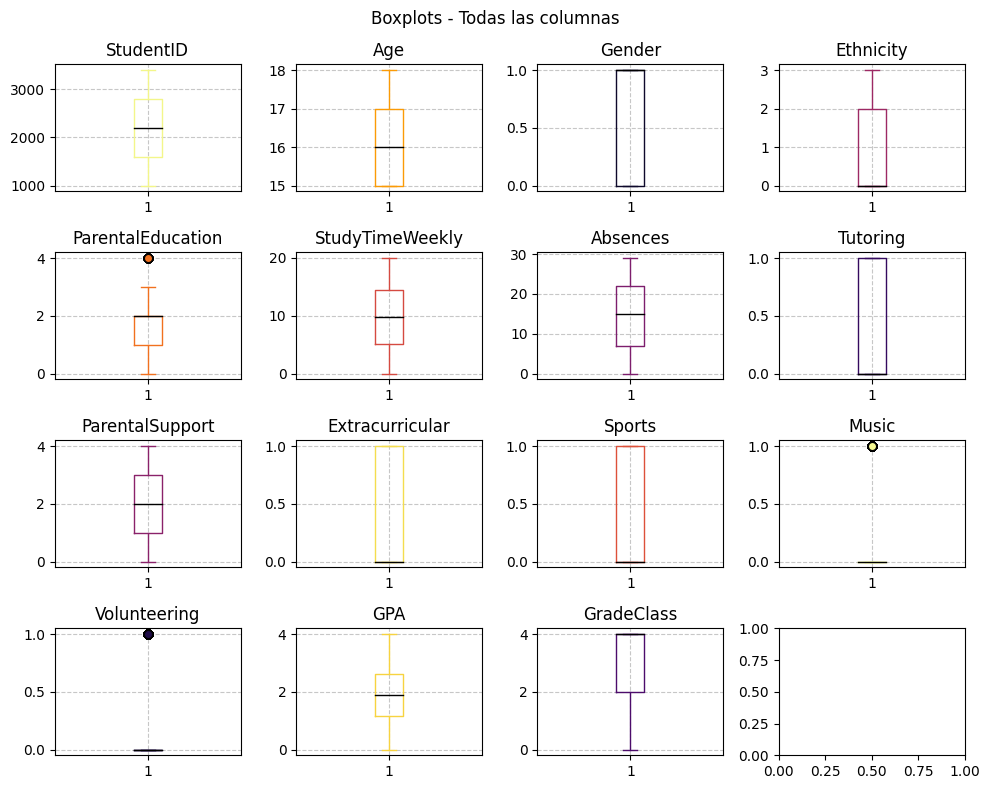

In [145]:
# Boxplot de todas las columnas, inclusive las que no utilizaremos y/o no nos interesan.

import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("students.csv")
#dataframe.drop(columns = ["StudentID", "Age", "Gender", "Ethnicity", "Volunteering", "GradeClass", "Tutoring", "Extracurricular", "Music", "GPA", "Sports"], inplace = True)

cant_variables = len(dataframe.columns)
fig, axes = plt.subplots(4, 4, figsize=(10, 8)) # Será una grilla 1x3 y con tamaño 15 10.

colores = plt.get_cmap("inferno") # Sacamos el colormap de Inferno, simplemente para la facha.

# Creamos los boxplots.
for ax, col in zip(axes.flatten(), dataframe.columns):
    color = colores(np.random.rand()) # Sacamos un color random de Inferno.
    # A continuación, a la hora de hacer el boxplot todo el choclo de props=dict es para ponerle color a la línea de la mediana, la caja, etc.
    ax.boxplot(dataframe[col],
               boxprops=dict(color=color),                              #Color
               medianprops=dict(color="black"),                         # ''
               whiskerprops=dict(color=color),                          # ''
               capprops=dict(color=color),                              # ''
               flierprops=dict(markerfacecolor=color, marker="o")       # ''
               )

    ax.set_title(col) # Ponemos el título.
    ax.grid(True, linestyle="--", alpha=0.7) # Activamos la grilla y lo configuramos.

plt.suptitle("Boxplots - Todas las columnas")
plt.tight_layout()
plt.show()

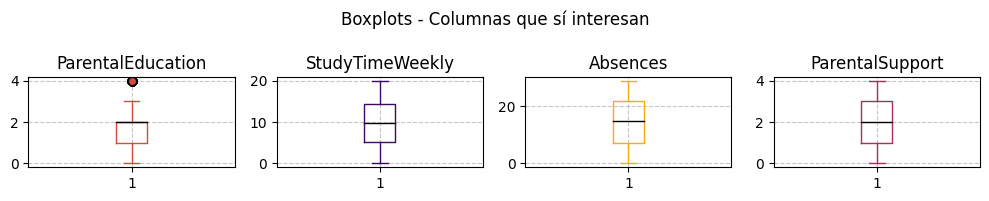

In [146]:
# Boxplot de las variables que sí nos interesan (hay otras que también pero no las ponemos porque es 1/0).

import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("students.csv")
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Ethnicity", "Volunteering", "GradeClass", "Tutoring", "Extracurricular", "Music", "GPA", "Sports"], inplace = True)

cant_variables = len(dataframe.columns)
fig, axes = plt.subplots(1, 4, figsize=(10, 2)) # Será una grilla 1x3 y con tamaño 15 10.

colores = plt.get_cmap("inferno") # Sacamos el colormap de Inferno, simplemente para la facha.

# Creamos los boxplots.
for ax, col in zip(axes.flatten(), dataframe.columns):
    color = colores(np.random.rand()) # Sacamos un color random de Inferno.
    # A continuación, a la hora de hacer el boxplot todo el choclo de props=dict es para ponerle color a la línea de la mediana, la caja, etc.
    ax.boxplot(dataframe[col],
               boxprops=dict(color=color),                              #Color
               medianprops=dict(color="black"),                         # ''
               whiskerprops=dict(color=color),                          # ''
               capprops=dict(color=color),                              # ''
               flierprops=dict(markerfacecolor=color, marker="o")       # ''
               )

    ax.set_title(col) # Ponemos el título.
    ax.grid(True, linestyle="--", alpha=0.7) # Activamos la grilla y lo configuramos.

plt.suptitle("Boxplots - Columnas que sí interesan")
plt.tight_layout()
plt.show()

Al observar los boxplots, podemos ver que hay muy pocos valores atípicos en nuestra base de datos. De hecho, eliminamos los boxplots de las variables categóricas (en general eran 0/1), y si bien había algún que otro valor atípico no era algo exagerado y además ninguno se situaba sobre alguna columna con muy alta correlación.

Esto es algo bueno ya que no hace falta que nos preocupemos muchísimo por una posible distorsión en la interpretación/análisis de los datos debido a valores atípicos.

En este caso, dado que son pocos y la correlación de las variables que contienen esos valores atípicos es baja, decidimos dejarlos.

Es decir, estas tienen un impacto bajo (poca influencia) en el modelo, por lo que probablemente no afecten a gran escala los resultados de predicción en general.

### **Transformaciones**
---

En este caso, no es necesario realizar transformaciones a los datos, ya que están convertidos a valores numéricos aptos para el desarrollo de una red neuronal, es decir, que pueden usarse para realizar multiplicaciones matriciales, y están determinados siguiendo una determinada lógica (por ejemplo, un valor más bajo de clase implica un mejor rendimiento, y no es un número asignado arbitrariamente). La única excepción es la columna de GPA, que deberá pasarse a valores de 0 (Bueno) o 1 (Malo) para que la red neuronal funcione. Además, se puede eliminar en primera instancia las variables que no influyen en el rendimiento académico de los estudiantes, las cuales se detallaron más arriba.

In [147]:
#Se elimina las columnas de ID, Edad, Género y Etnia. # Agrego las otras dos que tampoco aportan algo relevante.
dataframe = pd.read_csv("students.csv") # Si no lo pongo, tira error por más que se haga (Run All).
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Ethnicity", "Volunteering", "GradeClass"], inplace = True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

#Se cambia los valores de GPA por 1 (Bueno) o 0 (Malo)
dataframe.loc[dataframe['GPA'] <= 2, 'GPA'] = 1
dataframe.loc[dataframe['GPA'] > 2, 'GPA'] = 0

print(dataframe['GPA'].sum())
print(2391/321)
print(dataframe.head(10))

1274.0
7.4485981308411215
   ParentalEducation  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  GPA
0                  2        19.833723         7         1                2                0       0      1  0.0
1                  1        15.408756         0         0                1                0       0      0  0.0
2                  3         4.210570        26         0                2                0       0      0  1.0
3                  3        10.028829        14         0                3                1       0      0  0.0
4                  2         4.672495        17         1                3                0       0      0  1.0
5                  1         8.191219         0         0                1                1       0      0  0.0
6                  1        15.601680        10         0                3                0       1      0  0.0
7                  4        15.424496        22         1                1    

# Desarrollo de la Red Neuronal

### **Arquitectura de la Red**
---

El objetivo de una red neuronal es, básicamente, predecir una variable de una base de datos a partir de otras relacionadas a ella, por medio de cálculos. En concreto, es entrenada con una parte de la base, realizando las cuentas y verificando qué tan alejados de los valores reales están los resultados obtenidos, y, a partir de eso, ajusta sus cálculos internos para ajustarse mejor a lo esperable. Esto lo ejecuta una cantidad de veces determinada por el usuario de la red.

En esta sección se dará la explicación cada una de sus partes a medida que se vaya desarrollando la creación de la estructura de este trabajo.

#### **Capas de la Red**

La red neuronal estará compuesta por tres capas:
*   ***Capa de Entrada***: Es la encargada de recibir las variables numéricas que representan los datos de entrada para el modelo.

*   ***Capa Oculta***: Donde se realiza la *mistery math*, es decir, los cálculos internos del modelo (combinaciones y transformaciones de datos).

*   ***Capa de Salida***: Su objetivo es el de dar la predicción final, en este caso, el GPA.

Más detalladamente, en primer lugar, nuestra red neuronal recibirá en la *capa de entrada* variables en las neuronas que corresponden a cada variable (columna) en nuestra red. En nuestro caso, tendremos una variable para cada columna que hemos decidido utilizar (ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music). Además, las mismas variables son numéricas y están procesadas (transformadas) para el uso adecuado en el modelo.

En segundo lugar, la capa oculta es donde se realiza el procesamiento más importante de la red neuronal. Primero que nada, cada neurona está conectada a todas las variables de entrada de la capa anterior (la de entrada) y se encarga de realizar operaciones matemáticas (específicamente álgebra lineal, multiplicaciones y sumas ponderadas haciendo uso de weights y biases) para extraer "patrones", podríamos decir, en los datos. Además, esta capa cuenta con una función de activación, en nuestro caso utilizaremos la *ReLU*.

Y finalmente tenemos la capa de salida, la capa final. Su tarea es la de generar una predicción basada en la información procesada por la capa oculta. En nuestro caso, la predicción del GPA, tendrá una única neurona que va a devolver un valor (el GPA predicho) a partir de las neuronas en la capa oculta. En este caso en específico utilizamos una función de activación de tipo *logística*. Utilizamos esa en específico porque predecimos un valor entre 0 y 1 (si el GPA es <=0.5 es malo, si es >0.5 es bueno)

#### **Neuronas y Funciones de Activación**

* ***Capa de Entrada***: Tendrá 8 neuronas.

* ***Capa Oculta***: Tendrá 8 neuronas también, utilizará una función de activación tipo *ReLU*.

* ***Capa de Salida***: Tendrá 1 sola neurona, utilizará una función de activación tipo *logística*.

###### *En la oculta puse 8 para que quede simétrico, podemos experimentar con otras mientras entrenamos si es que no funciona muy bien.*

Con respecto a la capa de entrada, como se mencionó anteriormente, tendremos 8 neuronas porque son 8 variables las que manejamos para poder predecir el GPA justamente.

En segundo lugar, nuestra capa oculta maneja 8 neuronas, por una simple decisión de diseño. La misma tendrá una función de activación de tipo ReLU. El objetivo de esta última es el de convertir los valores negativos en cero, es muy eficiente y mitiga el problema del gradiente desvaneciente (cuando las pendientes de las derivadas tienden a 0 y molestan en el entrenamiento).

Por último, la capa de salida utilizará una función de tipo logística simple. Esta función de activación nos viene muy bien ya que toma los valores provenientes de la capa oculta (weights, bias y el propio bias de la capa) y devuelve un valor entre 0 y 1, facilitando muchísimo la clasificación en un problema binario. Es excelente para nuestro modelo de clasificación de alumno bueno o malo.


#### **Conexión**

Entonces, teniendo en cuenta todo lo anteriormente mencionado, podemos ver que nuestra red está conectada de la siguiente forma.

* Capa de Entrada -> 8 nodos (son las entradas).

* Capa Oculta -> 8 nodos. Cada nodo recibe todas las entradas.

* Capa de Salida -> 1 nodo. El único nodo recibe todas las salidas de la capa ocultas (serían 8 salidas).

Debemos tener en cuenta que todo estas conexiones también la podríamos representar con vectores y matrices, que es justamente lo que utilizaremos a la hora de entrenar la red debido a la gran eficiencia y rendimiento que proveen.

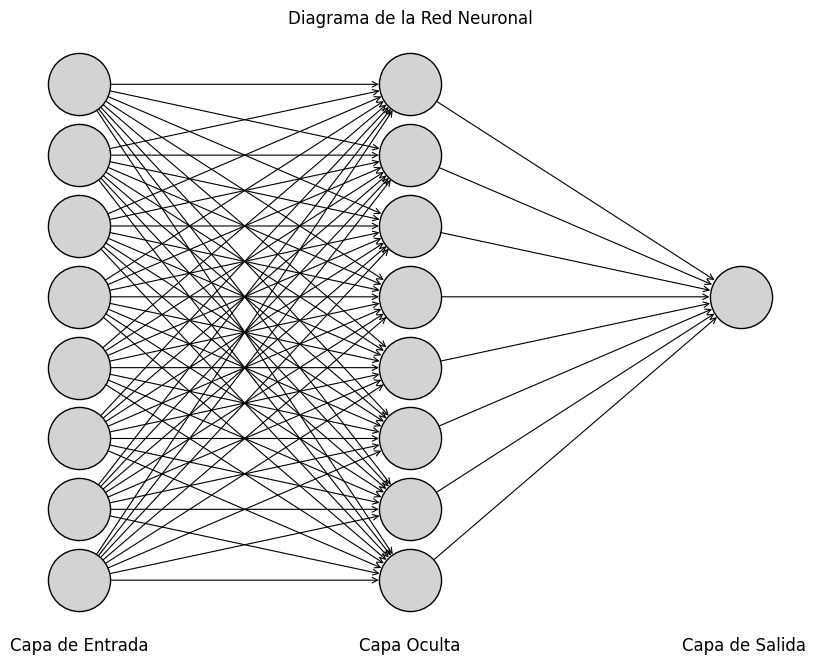

In [148]:
# Código que grafica la red neuronal, matplotlib + networkx.

import matplotlib.pyplot as plt
import networkx as nx

# Dimensiones de la red
neuronas_entrada = 8
neuronas_ocultas = 8
neuronas_salida = 1

G = nx.DiGraph() # Crea el grafo (vacío).

# Agregar nodos para la capa de entrada
for i in range(neuronas_entrada):
    G.add_node(f'Input {i+1}', pos=(0, i))

# Agregar nodos para la capa oculta
for i in range(neuronas_ocultas):
    G.add_node(f'Hidden {i+1}', pos=(1, i))

# Agregar nodo para la capa de salida
G.add_node('Output', pos=(2, neuronas_ocultas//2))

# Agregar las conexiones entre las capas
for i in range(neuronas_entrada):
    for j in range(neuronas_ocultas):
        G.add_edge(f'Input {i+1}', f'Hidden {j+1}')

for j in range(neuronas_ocultas):
    G.add_edge(f'Hidden {j+1}', 'Output')

pos = nx.get_node_attributes(G, 'pos') # Algo que tiene que ver con la posición de los nodos.

plt.figure(figsize=(8, 6)) # Se dibuja la red.

# Config del estilo (colores, bordes, flechas, etc.).
nx.draw(G, pos, with_labels=False, node_size=2000, node_color="lightgray",
        edgecolors="black", font_size=10, font_weight="bold", arrows=True,
        arrowstyle='->', arrowsize=10, width=0.8)

# Etiquetas
plt.text(0, -1, 'Capa de Entrada', fontsize=12, ha='center')
plt.text(1, -1, 'Capa Oculta', fontsize=12, ha='center')
plt.text(2.01, -1, 'Capa de Salida', fontsize=12, ha='center')

plt.title("Diagrama de la Red Neuronal")
plt.show()


#### **Dentro de la Red**

###### *Acá podría hacer las matrices, quedaría fachero y no sería mucho quilombo, capaz suma algo.*
###### *Acá se me ocurre que estaría muy bien explicar la matemática por detrás de la red, no es nada complejo y capaz queda bien demostrar cómo quedarían las multiplicaciones entre matrices, transformaciones, sus tamaños, etc etc. De última lo hacemos en borrador acá y lo pasamos en prolijo para el doc*

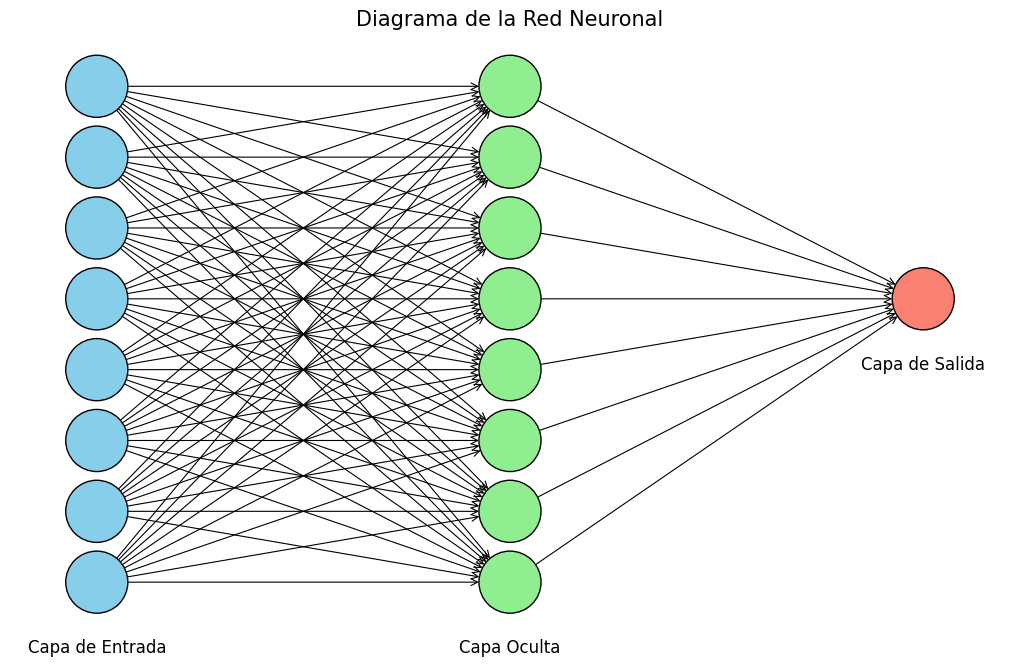

In [149]:
import matplotlib.pyplot as plt
import networkx as nx

# Dimensiones de la red
neuronas_entrada = 8
neuronas_ocultas = 8
neuronas_salida = 1

G = nx.DiGraph()  # Crea el grafo (vacío).

# Agregar nodos para la capa de entrada
for i in range(neuronas_entrada):
    G.add_node(f'Input {i+1}', pos=(0, i))

# Agregar nodos para la capa oculta
for i in range(neuronas_ocultas):
    G.add_node(f'Hidden {i+1}', pos=(1, i))

# Agregar nodo para la capa de salida
G.add_node('Output', pos=(2, neuronas_ocultas//2))

# Agregar las conexiones entre las capas
for i in range(neuronas_entrada):
    for j in range(neuronas_ocultas):
        G.add_edge(f'Input {i+1}', f'Hidden {j+1}')

for j in range(neuronas_ocultas):
    G.add_edge(f'Hidden {j+1}', 'Output')

# Extraer posiciones de los nodos
pos = nx.get_node_attributes(G, 'pos')

plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Colores por capa
node_color_map = ["skyblue"] * neuronas_entrada + ["lightgreen"] * neuronas_ocultas + ["salmon"]
node_size_map = [2000] * neuronas_entrada + [2000] * neuronas_ocultas + [2000]  # Tamaño de nodos

# Dibujar el grafo
nx.draw(G, pos, with_labels=False, node_size=node_size_map, node_color=node_color_map,
        edgecolors="black", font_size=10, font_weight="bold", arrows=True,
        arrowstyle='->', arrowsize=12, width=0.8)

# Etiquetas para cada capa
plt.text(0, -1, 'Capa de Entrada', fontsize=12, ha='center')
plt.text(1, -1, 'Capa Oculta', fontsize=12, ha='center')
plt.text(2, neuronas_ocultas//2 - 1, 'Capa de Salida', fontsize=12, ha='center')

plt.title("Diagrama de la Red Neuronal", fontsize=15)
plt.show()


##### **Repaso**

Si bien ya vimos cómo es el diagrama de nuestra red neuronal, ahora profundizaremos un poco más para ver qué operaciones matemáticas se estarán realizando por debajo *(la famosa mistery math)*. Esto no sólo nos servirá para poder comenzar a pensar en entrenar nuestra red neuronal, sino para entender verdaderamente qué estamos haciendo y comprender esa "magia" que ocurre.

Primero que nada, como ya sabemos tendremos 8 variables de entrada en la capa de entrada justamente.

Luego en la capa oculta contaremos también con 8 neuronas (esto es una decisión de diseño la cual puede ser modificada en caso de encontrar otra configuración que brinde mejores resultados en las predicciones). Cada una de esas 8 neuronas de la capa oculta recibirá las 8 variables de la capa de entrada y tendremos que sumar un bias de la capa oculta.

Finalmente, a la capa de salida le ocurre exactamente lo mismo que a la oculta con la de entrada, la diferencia es que en este caso no tenemos 8 neuronas sino que tenemos una sola, pues en esta instancia es cuando ya debemos dar un valor que pueda ser comprendido para utilizar en nuestra red de clasificación.

Está demás decir, como ya mencionamos, que en la capa oculta y en la capa de salida utilizamos funciones de activaciones. En la oculta la ReLU y en la de salida una tipo logística.

Ahora, todas esas entradas, pesos, bias y conjunto de datos activados y no activados lo podemos representar en matrices (y no solo por diversión, es justamente lo que vamos a utilizar para poder hacer muchísimo más eficiente la red neuronal, utilizar listas de python o alguna otra alternativa probablemente sea terriblemente ineficiente, lo que limitaría muchísimo el tema de la red neuronal: es interesantre que justamente ese era el limitante en el pasado, la capacidad de cómputo.)

##### **Capa Oculta**

¿Qué contiene un nodo de una capa oculta exactamente?

Bueno, primero que nada y como vimos anteriormente, recibimos las 8 variables de entrada en cada nodo. Pero además, tenemos pesos asociados a cada variable en cada nodo de la capa oculta (y también en la de salida).

Esto es así porque básicamente cada nodo es una función lineal que utiliza los pesos y sesgos para realizar multiplicaciones y sumas con los valores de entrada. Además, a cada nodo también se le añade un sesgo adicional.

Este proceso se repite exactamente igual en la capa de salida, solo que ahí tenemos una única neurona.

*Recordar: Esto es solo lo que le pasa a una única neurona de la capa oculta, pero le pasa a todas. Graficar esto mismo con todas a la vez sería un poquito complicado 🗿*

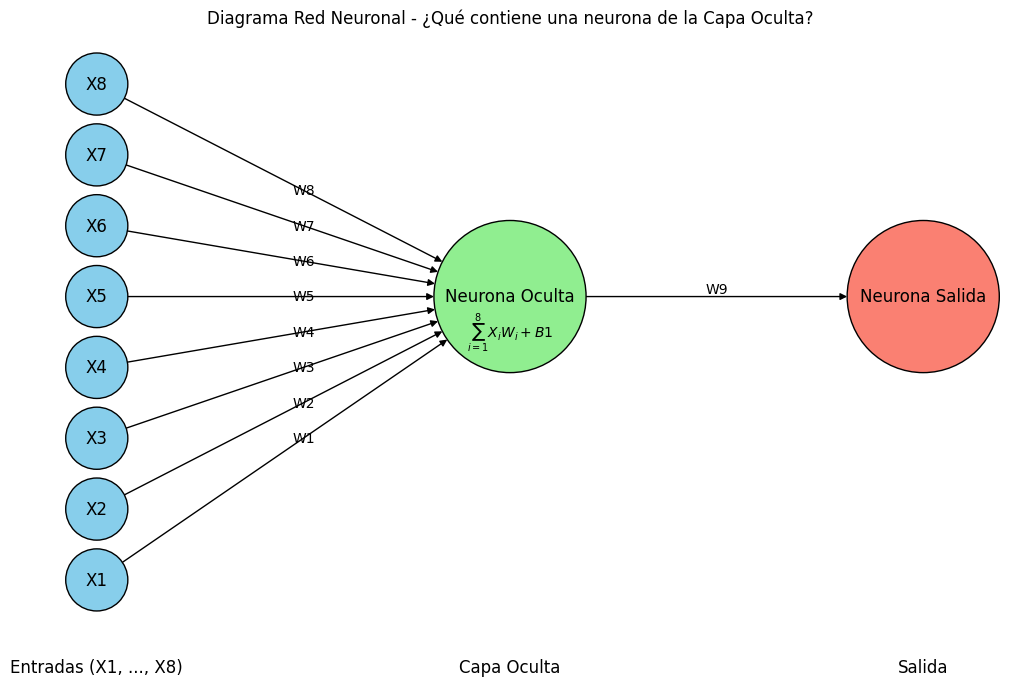

In [150]:
import matplotlib.pyplot as plt
import networkx as nx

# Crear el grafo dirigido
G = nx.DiGraph()

# Agregar nodos de entrada (x1, x2, ..., x8) en orden descendente
for i in range(8, 0, -1):  # Cambiado a 8, 7, ..., 1
    G.add_node(f'X{i}', pos=(1, i), color='skyblue')  # Nodos entrada.

# Agregar el nodo de la neurona oculta con un tamaño mayor
G.add_node('Neurona Oculta', pos=(2, 5), color='lightgreen')  # Nodo capa oculta.

# Agregar el nodo de salida
G.add_node('Neurona Salida', pos=(3, 5), color='salmon')  # Nodo salida.

# Conectar las entradas a la neurona oculta
for i in range(1, 9):
    G.add_edge(f'X{i}', 'Neurona Oculta')

# Conectar la neurona oculta al nodo de salida
G.add_edge('Neurona Oculta', 'Neurona Salida')

# Obtener las posiciones de los nodos
pos = nx.get_node_attributes(G, 'pos')

# Obtener los colores de los nodos
node_colors = [G.nodes[node]['color'] for node in G.nodes()]

# Definir los tamaños de los nodos
node_sizes = [2000 if 'X' in node else 12000 for node in G.nodes()]

plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Dibujar el grafo con tamaños de nodos específicos
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, edgecolors="black", arrows=True)

plt.text(2, 4.5, r'$\sum_{i=1}^{8} X_i W_i + B1$', ha='center', va='center') # La sumatoria de las variables con los pesos y el sesgo.

# Añadir etiquetas de peso a las aristas cerca de las flechas
for i in range(1, 9):
    # Calcular la posición media entre X{i} y la neurona
    mid_x = 1.5
    mid_y = (i + 5) / 2  # La media entre la posición del nodo de entrada y la neurona
    plt.text(mid_x, mid_y, f'W{i}', fontsize=10, ha='center', va='center', color='black')

# Etiqueta de la salida
plt.text(2.5, 5, 'W9', fontsize=10, ha='center', va='bottom', color='black')

# Agregar nombres debajo de cada conjunto de nodos
plt.text(1, -0.3, 'Entradas (X1, ..., X8)', fontsize=12, ha='center')
plt.text(2, -0.3, 'Capa Oculta', fontsize=12, ha='center')
plt.text(3, -0.3, 'Salida', fontsize=12, ha='center')

plt.title("Diagrama Red Neuronal - ¿Qué contiene una neurona de la Capa Oculta?")
plt.show()


Básicamente lo que tenemos dentro de esa neurona sería lo siguiente:

$$ X_1 W_1 + X_2 W_2 + X_3 W_3 + X_4 W_4 + X_5 W_5 + X_6 W_6 + X_7 W_7 + X_8 W_8 + B1 $$


###### *Lo dejo así, cuando lo pase al doc lo completo al fondo y si suma meto lo de las matrices, etc.1*

### Implementación de la Red - Numpy
---

Empezamos con valores al azar

In [151]:
# Importamos las librerías.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

In [152]:
# Primero esta.
# En esta celda se crean las derivadas y funciones de activación para usar en la red neuronal
from sympy import *

# Derivadas de las funciones de activación
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

L = 0.05  # La tasa de aprendizaje

# Esto se hace para poder visualizar las derivadas sin asignar valores reales a las variables a derivar
W1, W2, B1, B2, A1, A2, Z1, Z2, X, Y = symbols('W1 W2 B1 B2 A1 A2 Z1 Z2 X Y')

# Derivada de la función costo respecto a A2
C = (A2 - Y)**2
dC_dA2 = diff(C, A2)    # Lo que hace diff es derivar el primer símbolo respecto al segundo
print("dC_dA2 = ", dC_dA2) # 2*A2 - 2*Y

# Derivada de A2 respecto de Z2
logistic = lambda x: 1 / (1 + exp(-x))
_A2 = logistic(Z2)
dA2_dZ2 = diff(_A2, Z2)
print("dA2_dZ2 = ", dA2_dZ2) # exp(-Z2)/(1 + exp(-Z2))**2

# Derivada de Z2 respecto a A1
_Z2 = A1*W2 + B2
dZ2_dA1 = diff(_Z2, A1)
print("dZ2_dA1 = ", dZ2_dA1) # W2

# Derivada de Z2 respecto a W2
dZ2_dW2 = diff(_Z2, W2)
print("dZ2_dW2 = ", dZ2_dW2) # A1

# Derivada de Z2 respecto a B2
dZ2_dB2 = diff(_Z2, B2)
print("dZ2_dB2 = ", dZ2_dB2) # 1

# Derivada de A1 respecto de Z1
relu = lambda x: Max(x, 0)
_A1 = relu(Z1)

d_relu = lambda x: x > 0 # Pendiente es 1 para los positivos, 0 para los negativos
dA1_dZ1 = d_relu(Z1)
print("dA1_dZ1 = ", dA1_dZ1) # Z1 > 0

# Derivada de Z1 respecto a W1
_Z1 = X*W1 + B1
dZ1_dW1 = diff(_Z1, W1)
print("dZ1_dW1 = ", dZ1_dW1) # X

# Derivada de Z1 respecto a B1
dZ1_dB1 = diff(_Z1, B1)
print("dZ1_dB1 = ", dZ1_dB1) # 1

dC_dA2 =  2*A2 - 2*Y
dA2_dZ2 =  exp(-Z2)/(1 + exp(-Z2))**2
dZ2_dA1 =  W2
dZ2_dW2 =  A1
dZ2_dB2 =  1
dA1_dZ1 =  Z1 > 0
dZ1_dW1 =  X
dZ1_dB1 =  1


###### *Juan, si me olvido de decirte acá tengo dudas: en la línea 4 y 5, ¿no deberíamos ver si el GPA es >= 2.5 (bueno, True) o si el GPA es < 2.5 (malo, False)?*
###### *Luego, en la línea 40 no sería test_comparisons = ... test_predictions >= .5 .... ?*
###### *Todo con respecto a la celda de abajo*

## YA LO VIMOS


In [162]:
# En esta celda definimos el forward propagation, y probamos la red sin entrenar

dataframe = pd.read_csv("students.csv") # Si no lo pongo, tira error por más que se haga (Run All).
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Ethnicity", "Volunteering", "GradeClass"], inplace = True)

dataframe.loc[dataframe['GPA'] <= 2, 'GPA'] = 1 ###ERA ESTO LO QUE FALTABA
dataframe.loc[dataframe['GPA'] > 2, 'GPA'] = 0
#print(dataframe)

# Construir una red neuronal con pesos y sesgos
# iniciados aleatoriamente
w_hidden = np.random.rand(8, 8) * 2 - 1 #Pareciera que sin restar 1 da más accuracy
w_output = np.random.rand(1, 8) * 2 - 1

b_hidden = np.random.rand(8, 1) * 2 - 1
b_output = np.random.rand(1, 1) * 2 - 1

# Se extrae las columnas de entrada
all_inputs = (dataframe.iloc[:, 0:8].values)
# Se extrae la columna de salida
all_outputs = dataframe.iloc[:, -1].values

# Se divide en un conjunto de entrenamiento y uno de prueba (un tercio para el testeo)
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size=1/3)

n = X_train.shape[0] # número de registros de entrenamiento

# Funcion que corre la red neuronal con los datos de entrada para predecir la salida
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2


# Función que realiza forward y backward, para entrenar la red
def aplicarRed(L, rango):
  for i in range(rango):
      # seleccionar aleatoriamente uno de los datos de entrenamiento
      idx = np.random.choice(n, 1, replace=False)
      X_sample = X_train[idx].transpose()
      Y_sample = Y_train[idx]

      # pasar datos seleccionados aleatoriamente a través de la red neuronal
      Z1, A1, Z2, A2 = forward_prop(X_sample)

      # distribuir error a través de la retropropagación
      # y devolver pendientes para pesos y sesgos
      dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

      # actualizar pesos y sesgos
      w_hidden -= L * dW1
      b_hidden -= L * dB1
      w_output -= L * dW2
      b_output -= L * dB2

In [165]:
# Cuarta esta.
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions > .5).flatten().round(), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("ACCURACY: ", accuracy)

ACCURACY:  0.3771929824561375


### Mejorando la red

In [158]:
# Se van a fijar valores para poder optimizar valores de L y rango. Luego se van a graficar para ver cuál es más conveniente.

dataframe = pd.read_csv("students.csv") # Si no lo pongo, tira error por más que se haga (Run All).
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Ethnicity", "Volunteering", "GradeClass"], inplace = True)

np.random.seed(0) # Importante: Inicializamos en 0 para que siempre de los mismos valores random.
w_hidden = np.random.rand(8, 8) * 2 - 1 #Pareciera que sin restar 1 da más accuracy
w_output = np.random.rand(1, 8) * 2 - 1

b_hidden = np.random.rand(8, 1) * 2 - 1
b_output = np.random.rand(1, 1) * 2 - 1


# Listas que usamos para los gráficos.
accuracy_TEST_l = []
accuracy_TRAIN_l = []

# Además, a la hora de ir entrenando la red tendremos que ir guardando información para realizar los gráficos.
def entrenarProbarGuardar(listaEles, listaIteraciones):
  global w_hidden, w_output, b_hidden, b_output  # Declara las variables como globales
  global accuracy_TEST, accuracy_TRAIN

  for L in listaEles:
    for rango in listaIteraciones:
      aplicarRed(ele, rango)

  # Calculamos de precisión TEST
  predictions = forward_prop(X_test.transpose())[3] # Capa de salida A2
  test_comparisons = np.equal((predictions > 0.5).flatten().round(), Y_test) # Cambiará en algo el =>
  accuracy_TEST = sum(test_comparisons.astype(int) / X_test.shape[0])
  accuracy_TEST_l.append(accuracy_TEST)

  # Calculamos presición de TRAIN
  predictions = forward_prop(X_train.transpose())[3] # Capa de salida A2
  train_comparisons = np.equal((predictions > 0.5).flatten().round(), Y_train)
  accuracy_TRAIN = sum(train_comparisons.astype(int) / X_train.shape[0])
  accuracy_TRAIN_l.append(accuracy_TRAIN)
  print(f"L = {ele}; Iteraciones = {rango}; Accuracy = {accuracy_TEST}")

entrenarProbarGuardar([0.0001], [30_000])

print(f"Precisión de x_test post-entrenamiento: {accuracy_TEST}")
print(f"Precisión de x_train post-entrenamiento: {accuracy_TRAIN}")

# L=0.05, 30k iter -> 54% test
# L=0.05, 50k iter -> 46% test

  0%|          | 0/30000 [00:00<?, ?it/s]

L = 0.0001; Iteraciones = 30000; Accuracy = 0.8182957393483583
Precisión de x_test post-entrenamiento: 0.8182957393483583
Precisión de x_train post-entrenamiento: 0.828105395232101


In [159]:
## Ir probando distintos L y range
dataframe = pd.read_csv("students.csv") # Si no lo pongo, tira error por más que se haga (Run All).
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Ethnicity", "Volunteering", "GradeClass"], inplace = True)

np.random.seed(0) # Importante: Inicializamos en 0 para que siempre de los mismos valores random.
w_hidden = np.random.rand(8, 8) * 2 - 1 #Pareciera que sin restar 1 da más accuracy
w_output = np.random.rand(1, 8) * 2 - 1

b_hidden = np.random.rand(8, 1) * 2 - 1
b_output = np.random.rand(1, 1) * 2 - 1


# Listas que usamos para los gráficos.
accuracy_TEST_l = []
accuracy_TRAIN_l = []

# Lista de L a probar
l_probados = [0.01, 0.001, 0.0001, 0.005, 0.05, 0.0005]

# Lista de ranges a probar
range_probados = [1_000, 3_000, 5_000, 10_000, 50_000, 100_000, 500_000]

# Además, a la hora de ir entrenando la red tendremos que ir guardando información para realizar los gráficos.
entrenarProbarGuardar(l_probados, range_probados)

print(f"Precisión de x_test post-entrenamiento: {accuracy_TEST}")
print(f"Precisión de x_train post-entrenamiento: {accuracy_TRAIN}")

# L=0.05, 30k iter -> 54% test
# L=0.05, 50k iter -> 46% test

  0%|          | 0/1000 [00:00<?, ?it/s]

L = 0.01; Iteraciones = 1000; Accuracy = 0.8320802005012402


  0%|          | 0/3000 [00:00<?, ?it/s]

L = 0.01; Iteraciones = 3000; Accuracy = 0.8496240601503626


  0%|          | 0/5000 [00:00<?, ?it/s]

L = 0.01; Iteraciones = 5000; Accuracy = 0.924812030075173


  0%|          | 0/10000 [00:00<?, ?it/s]

L = 0.01; Iteraciones = 10000; Accuracy = 0.9122807017543713


  0%|          | 0/50000 [00:00<?, ?it/s]

L = 0.01; Iteraciones = 50000; Accuracy = 0.9310776942355738


  0%|          | 0/100000 [00:00<?, ?it/s]

L = 0.01; Iteraciones = 100000; Accuracy = 0.924812030075173


  0%|          | 0/500000 [00:00<?, ?it/s]

L = 0.01; Iteraciones = 500000; Accuracy = 0.9210526315789325


  0%|          | 0/1000 [00:00<?, ?it/s]

L = 0.001; Iteraciones = 1000; Accuracy = 0.9310776942355738


  0%|          | 0/3000 [00:00<?, ?it/s]

L = 0.001; Iteraciones = 3000; Accuracy = 0.9348370927318144


  0%|          | 0/5000 [00:00<?, ?it/s]

L = 0.001; Iteraciones = 5000; Accuracy = 0.9348370927318144


  0%|          | 0/10000 [00:00<?, ?it/s]

L = 0.001; Iteraciones = 10000; Accuracy = 0.9335839598997342


  0%|          | 0/50000 [00:00<?, ?it/s]

L = 0.001; Iteraciones = 50000; Accuracy = 0.9348370927318144


  0%|          | 0/100000 [00:00<?, ?it/s]

L = 0.001; Iteraciones = 100000; Accuracy = 0.9360902255638945


  0%|          | 0/500000 [00:00<?, ?it/s]

L = 0.001; Iteraciones = 500000; Accuracy = 0.9298245614034937


  0%|          | 0/1000 [00:00<?, ?it/s]

L = 0.0001; Iteraciones = 1000; Accuracy = 0.9310776942355738


  0%|          | 0/3000 [00:00<?, ?it/s]

L = 0.0001; Iteraciones = 3000; Accuracy = 0.932330827067654


  0%|          | 0/5000 [00:00<?, ?it/s]

L = 0.0001; Iteraciones = 5000; Accuracy = 0.9348370927318144


  0%|          | 0/10000 [00:00<?, ?it/s]

L = 0.0001; Iteraciones = 10000; Accuracy = 0.9335839598997342


  0%|          | 0/50000 [00:00<?, ?it/s]

L = 0.0001; Iteraciones = 50000; Accuracy = 0.9335839598997342


  0%|          | 0/100000 [00:00<?, ?it/s]

L = 0.0001; Iteraciones = 100000; Accuracy = 0.9348370927318144


  0%|          | 0/500000 [00:00<?, ?it/s]

L = 0.0001; Iteraciones = 500000; Accuracy = 0.9348370927318144


  0%|          | 0/1000 [00:00<?, ?it/s]

L = 0.005; Iteraciones = 1000; Accuracy = 0.9373433583959747


  0%|          | 0/3000 [00:00<?, ?it/s]

L = 0.005; Iteraciones = 3000; Accuracy = 0.9373433583959747


  0%|          | 0/5000 [00:00<?, ?it/s]

L = 0.005; Iteraciones = 5000; Accuracy = 0.9310776942355738


  0%|          | 0/10000 [00:00<?, ?it/s]

L = 0.005; Iteraciones = 10000; Accuracy = 0.9335839598997342


  0%|          | 0/50000 [00:00<?, ?it/s]

L = 0.005; Iteraciones = 50000; Accuracy = 0.9298245614034937


  0%|          | 0/100000 [00:00<?, ?it/s]

L = 0.005; Iteraciones = 100000; Accuracy = 0.9285714285714135


  0%|          | 0/500000 [00:00<?, ?it/s]

L = 0.005; Iteraciones = 500000; Accuracy = 0.9360902255638945


  0%|          | 0/1000 [00:00<?, ?it/s]

L = 0.05; Iteraciones = 1000; Accuracy = 0.9298245614034937


  0%|          | 0/3000 [00:00<?, ?it/s]

L = 0.05; Iteraciones = 3000; Accuracy = 0.9273182957393333


  0%|          | 0/5000 [00:00<?, ?it/s]

L = 0.05; Iteraciones = 5000; Accuracy = 0.9160401002506118


  0%|          | 0/10000 [00:00<?, ?it/s]

L = 0.05; Iteraciones = 10000; Accuracy = 0.9335839598997342


  0%|          | 0/50000 [00:00<?, ?it/s]

L = 0.05; Iteraciones = 50000; Accuracy = 0.932330827067654


  0%|          | 0/100000 [00:00<?, ?it/s]

L = 0.05; Iteraciones = 100000; Accuracy = 0.9210526315789325


  0%|          | 0/500000 [00:00<?, ?it/s]

L = 0.05; Iteraciones = 500000; Accuracy = 0.9310776942355738


  0%|          | 0/1000 [00:00<?, ?it/s]

L = 0.0005; Iteraciones = 1000; Accuracy = 0.9335839598997342


  0%|          | 0/3000 [00:00<?, ?it/s]

L = 0.0005; Iteraciones = 3000; Accuracy = 0.9385964912280549


  0%|          | 0/5000 [00:00<?, ?it/s]

L = 0.0005; Iteraciones = 5000; Accuracy = 0.9411027568922152


  0%|          | 0/10000 [00:00<?, ?it/s]

L = 0.0005; Iteraciones = 10000; Accuracy = 0.9360902255638945


  0%|          | 0/50000 [00:00<?, ?it/s]

L = 0.0005; Iteraciones = 50000; Accuracy = 0.9385964912280549


  0%|          | 0/100000 [00:00<?, ?it/s]

L = 0.0005; Iteraciones = 100000; Accuracy = 0.9373433583959747


  0%|          | 0/500000 [00:00<?, ?it/s]

L = 0.0005; Iteraciones = 500000; Accuracy = 0.9373433583959747
Precisión de x_test post-entrenamiento: 0.9373433583959747
Precisión de x_train post-entrenamiento: 0.9523212045169146


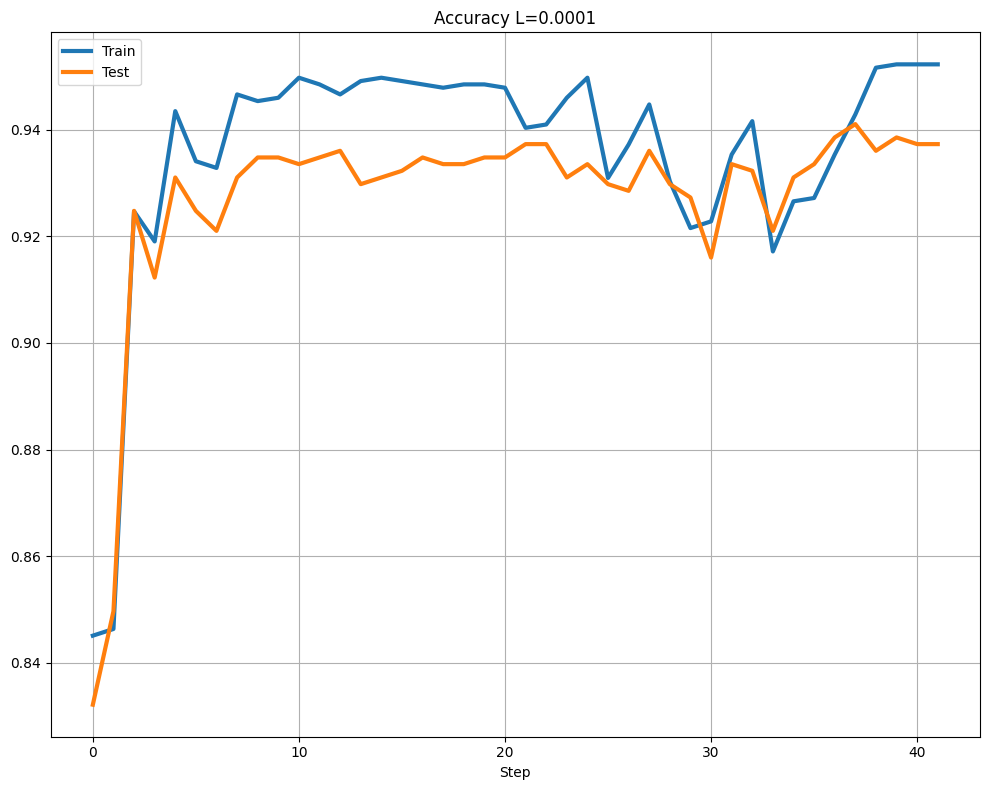

In [166]:
import matplotlib.pyplot as plt

fmt_train = {
    'color': 'tab:blue',
    'ls': 'solid',
    'lw': 3,
}

fmt_test = {
    'color': 'tab:orange',
    'ls': 'solid',
    'lw': 3,
}

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(accuracy_TRAIN_l, label="Train", **fmt_train)
ax.plot(accuracy_TEST_l, label="Test", **fmt_test)


ax.grid(which="both")
ax.legend()
ax.set_title(f"Accuracy {L=}")
ax.set_xlabel("Step")

fig.tight_layout()
plt.show()


# **Numpy**
---

In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Cargar datos
dataframe_ = pd.read_csv("students.csv")

# Eliminar columnas innecesarias
dataframe_.drop(columns=["StudentID", "Age", "Gender", "Ethnicity", "Volunteering", "GradeClass"], inplace=True)

# Asignar el DataFrame modificado a df
df = dataframe_

# Convertir el GPA en etiquetas
# Suponiendo que la última columna es el GPA y quieres clasificar según 2
df['GoodStudent'] = (df.iloc[:, -1] >= 2).astype(int)  # Crea una nueva columna con 1 para bueno y 0 para malo

# Extraer variables de entrada (todas las filas, todas las columnas menos la última y la nueva columna)
X = df.values[:, :-1]
# Extraer columna de salida (todas las filas, última columna que ahora es GoodStudent)
Y = df['GoodStudent'].values

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

# Crear el modelo de red neuronal
nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(8,),
                   activation='relu',
                   max_iter=5_000,
                   learning_rate_init=0.005,
                   random_state=42)

# Ajustar el modelo
nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
print("Pesos de las capas:")
for i, coef in enumerate(nn.coefs_):
    print(f"Capa {i + 1}: {coef}")

print("\nSesgos de las capas:")
for i, intercept in enumerate(nn.intercepts_):
    print(f"Capa {i + 1}: {intercept}")

print(nn.)

# Evaluar el modelo
print("Puntaje del conjunto de entrenamiento: %f" % nn.score(X_train, Y_train))
print("Puntaje del conjunto de prueba: %f" % nn.score(X_test, Y_test))



# Usé chat, luego leo la documentación y aclaro qué hace exactamente cada cosa.
# Pero, si scikit learn tira un 92 o por ahí de presición entonces no vamos mal.


Pesos de las capas:
Capa 1: [[-0.14240073  0.42945098  0.35490331  0.12802579 -0.09009165 -0.37905079
  -0.10738168  0.45698832]
 [ 0.22521689  0.32399209 -0.66273769  0.36861583 -0.0212435  -0.3627332
   0.031037   -0.32089794]
 [-0.5140982  -0.44414361  0.48500198  0.23864035  0.74833828 -0.41366501
  -0.87453407 -0.25964835]
 [-0.01544958  0.22944233 -0.19406562  0.02850437 -0.06026081 -0.53253981
   0.12447876 -0.36840128]
 [-0.48422938  0.45222359  0.28589635  0.34591906 -0.19436411 -0.47560946
   0.24589696 -0.0352361 ]
 [-0.41751643  0.04626275 -0.09176279  0.48762926 -0.13692561  0.19536268
   0.06330398  0.01823977]
 [ 0.14941541 -0.0618764   0.11272375  0.13302838 -0.02363251  0.41581708
   0.15321512  0.56197391]
 [-0.52821085 -0.39798146 -0.54677182 -0.15786389  0.09091665 -0.2901153
   0.08744907 -0.15957466]
 [ 0.16724885  0.77932868 -1.33812592 -0.20571015 -2.13445858  0.58864513
   1.72196044 -0.19985036]]
Capa 2: [[ 0.66846587]
 [ 0.83760568]
 [-1.24571023]
 [-0.221091